from pyspark import SparkContext
from sklearn.manifold import TSNE
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from pathlib import Path
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
import altair as alt
# ^^^ pyforest auto-imports - don't write above this line
# Imports

In [813]:
# pip install dwave_networkx

In [814]:
# pip install --upgrade networkx

In [815]:
import folium
from collections import Counter
import postman_problems
from postman_problems.solver import cpp
from postman_problems.stats import calculate_postman_solution_stats
import networkx as nx
import itertools
import dwave_networkx as dnx
import dimod

## His Data

In [816]:
sleeping_edgelist = pd.read_csv("/Users/gregfeliu/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/postman_problems/examples/sleeping_giant/edgelist_sleeping_giant.csv")

<IPython.core.display.Javascript object>

In [817]:
seven_bridges_edgelist = pd.read_csv('./examples/edgelist_seven_bridges.csv')

<IPython.core.display.Javascript object>

## My Data

In [818]:
stations_df = pd.read_csv("./saved_data/final_station_df.csv", index_col = 0)

<IPython.core.display.Javascript object>

In [819]:
non_unique_stations_df = pd.read_csv("./saved_data/non_unique_mta_stations.csv", index_col=0)

<IPython.core.display.Javascript object>

In [820]:
my_edgelist = pd.read_csv('./saved_data/edge_list_df_no_req.csv', index_col=0)

<IPython.core.display.Javascript object>

In [821]:
my_edgelist['trail'] = 'nyc'

In [822]:
node_list_df = pd.read_csv("./saved_data/nodelist_nyc_subway.csv", index_col=0)

<IPython.core.display.Javascript object>

In [823]:
node_list_df.reset_index(inplace=True)

### Which nodes in edgelist are different from nodelist?... None (now)

In [824]:
node1 = list(my_edgelist['node1'].unique())
node2 = list(my_edgelist['node2'].unique())
len(set(node1 + node2))

461

In [825]:
node_list_df.shape

(461, 3)

In [826]:
node_list_df.station_id.nunique()

461

In [827]:
node_list_df.columns

Index(['station_id', 'X', 'Y'], dtype='object')

In [828]:
for x in node_list_df['station_id']:
    if len(x) > 4:
        print(x)

112_A09
125_A24
127_R16
140_142
222_415
414_D11
710_G14
718_R09
A12_D13
A32_D20
A38_M22
D17_R17
D43_N12
H01_H02
H04_H19
M20_Q01


In [829]:
for x in my_edgelist['node1']:
    if 'A13' in x:
        print(x)

In [830]:
edgelist_nodes = set(node1 + node2)

In [831]:
nodelist_nodes = set(node_list_df['station_id'].unique())

In [832]:
edgelist_nodes - nodelist_nodes

set()

In [833]:
nodelist_nodes - edgelist_nodes

set()

# Example

In [834]:
# find CPP solution
circuit, graph = cpp(edgelist_filename='./examples/edgelist_seven_bridges.csv', start_node='D')

# print solution route
for e in circuit:
    print(e)

# print solution summary stats
for k, v in calculate_postman_solution_stats(circuit).items():
    print(k, v)

('D', 'C', 0, {'trail': 'g', 'distance': 3, 'id': 6, 'augmented': True})
('C', 'A', 1, {'trail': 'd', 'distance': 10, 'id': 3})
('A', 'C', 0, {'trail': 'c', 'distance': 2, 'id': 2})
('C', 'D', 0, {'trail': 'g', 'distance': 3, 'id': 6})
('D', 'B', 0, {'trail': 'f', 'distance': 9, 'id': 5})
('B', 'A', 0, {'trail': 'a', 'distance': 3, 'id': 0, 'augmented': True})
('A', 'B', 1, {'trail': 'b', 'distance': 5, 'id': 1})
('B', 'A', 0, {'trail': 'a', 'distance': 3, 'id': 0})
('A', 'D', 0, {'trail': 'e', 'distance': 1, 'id': 4})
distance_walked 39
distance_doublebacked 6
distance_walked_once 33
distance_walked_optional 0
distance_walked_required 39
edges_walked 9
edges_doublebacked 2
edges_walked_once 7
edges_walked_optional 0
edges_walked_required 9


# Applied to my data

## Visualize nodes

In [835]:
g = nx.Graph()

In [836]:
for i, elrow in my_edgelist.iterrows():
    # g.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())  # deprecated after NX 1.11
    g.add_edge(elrow[0], elrow[1], **elrow[2:].to_dict())

In [837]:
g

In [838]:
node_list_df.columns

Index(['station_id', 'X', 'Y'], dtype='object')

In [839]:
node_list_df[node_list_df['station_id'] == '140']

,station_id,X,Y


In [840]:
for i, nlrow in node_list_df.iterrows():
    nx.set_node_attributes(g, {nlrow['station_id']:  nlrow[1:].to_dict()})  

In [841]:
print('# of edges: {}'.format(g.number_of_edges()))
print('# of nodes: {}'.format(g.number_of_nodes()))

# of edges: 544
# of nodes: 461


In [842]:
list(g.nodes(data=True))[0:10] 

[('101', {'X': 40.889248, 'Y': -73.898583}),
 ('103', {'X': 40.884667, 'Y': -73.90087}),
 ('104', {'X': 40.878856, 'Y': -73.904834}),
 ('106', {'X': 40.874561, 'Y': -73.90983100000003}),
 ('107', {'X': 40.869444, 'Y': -73.915279}),
 ('108', {'X': 40.864621, 'Y': -73.91882199999998}),
 ('109', {'X': 40.860531, 'Y': -73.925536}),
 ('110', {'X': 40.855225, 'Y': -73.929412}),
 ('111', {'X': 40.849505, 'Y': -73.933596}),
 ('112_A09', {'X': 40.840556, 'Y': -73.94013299999997})]

In [843]:
# for x in list(g.nodes(data=True)):
#     print(x[1]['Y'])
node_positions_as_dict = {x[0]: x[1] for x in list(g.nodes(data=True))}

In [844]:
node_positions_as_dict['101']['X']

40.889248

In [845]:
node_positions_final = {key: value for key, value in node_positions_as_dict.items()}

In [846]:
node_positions_final['101']['X']

40.889248

In [847]:
test_node_positions = {node[0]: (node[1]) for node in g.nodes(data=True)}

In [848]:
for key, value in test_node_positions.items():
    if value == {}:
        print(key)    

In [849]:
node_list_df.shape

(461, 3)

In [850]:
test_node_positions['140_142']

{'X': 40.701411, 'Y': -74.013205}

In [851]:
test_node_positions['142']

KeyError: '142'

In [852]:
test_node_positions

{'101': {'X': 40.889248, 'Y': -73.898583},
 '103': {'X': 40.884667, 'Y': -73.90087},
 '104': {'X': 40.878856, 'Y': -73.904834},
 '106': {'X': 40.874561, 'Y': -73.90983100000003},
 '107': {'X': 40.869444, 'Y': -73.915279},
 '108': {'X': 40.864621, 'Y': -73.91882199999998},
 '109': {'X': 40.860531, 'Y': -73.925536},
 '110': {'X': 40.855225, 'Y': -73.929412},
 '111': {'X': 40.849505, 'Y': -73.933596},
 '112_A09': {'X': 40.840556, 'Y': -73.94013299999997},
 '113': {'X': 40.834041, 'Y': -73.94489},
 '114': {'X': 40.826551, 'Y': -73.95036},
 '115': {'X': 40.822008, 'Y': -73.953676},
 '116': {'X': 40.815581, 'Y': -73.958372},
 '117': {'X': 40.807722, 'Y': -73.96410999999998},
 '118': {'X': 40.803967, 'Y': -73.966847},
 '119': {'X': 40.799446, 'Y': -73.968379},
 '120': {'X': 40.793919, 'Y': -73.972323},
 '123': {'X': 40.778453000000006, 'Y': -73.98196999999998},
 '121': {'X': 40.788644, 'Y': -73.976218},
 '227': {'X': 40.799075, 'Y': -73.95182199999998},
 '122': {'X': 40.783934, 'Y': -73.97991

In [853]:
node_positions = {node[0]: (node[1]['Y'], node[1]['X']) for node in list(g.nodes(data=True))}
# Preview of node_positions with a bit of hack (there is no head/slice method for dictionaries).
# dict(list(node_positions.items())[0:5])

<IPython.core.display.Javascript object>

/Users/gregfeliu/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:518: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  The minimum margin (gap) at the end of the edge at the target.


AttributeError: module 'matplotlib.cbook' has no attribute 'is_numlike'

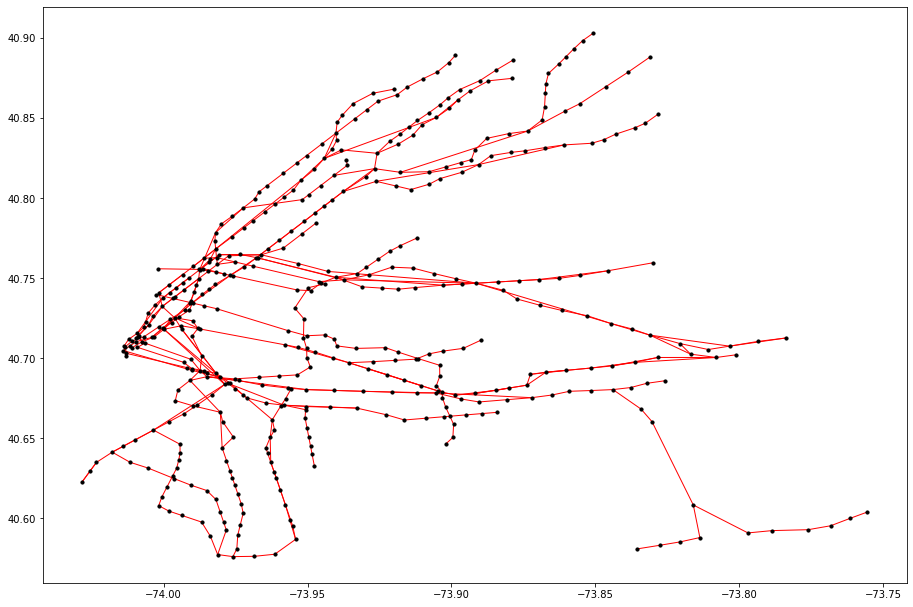

In [854]:
plt.figure(figsize=(12, 8))
nx.draw(g, pos=node_positions, edge_color='red', node_size=10, node_color='black')
plt.title('Graph Representation of Sleeping Giant Trail Map', size=15)
plt.show()

## Solve Problem

In [855]:
nodes_odd_degree = [v for v, d in g.degree() if d % 2 == 1]
nodes_odd_degree[0:5]

['101', '112_A09', '125_A24', '128', '140_142']

In [856]:
print('Number of nodes of odd degree: {}'.format(len(nodes_odd_degree)))
print('Number of total nodes: {}'.format(len(g.nodes())))

Number of nodes of odd degree: 82
Number of total nodes: 461


In [857]:
# Compute all pairs of odd nodes. in a list of tuples
odd_node_pairs = list(itertools.combinations(nodes_odd_degree, 2))
# Preview pairs of odd degree nodes
odd_node_pairs[0:3]

[('101', '112_A09'), ('101', '125_A24'), ('101', '128')]

In [858]:
print('Number of pairs: {}'.format(len(odd_node_pairs)))

Number of pairs: 3321


In [859]:
def get_shortest_paths_distances(graph, pairs, edge_weight_name):
    """Compute shortest distance between each pair of nodes in a graph.  Return a dictionary keyed on node pairs (tuples)."""
    distances = {}
    for pair in pairs:
        distances[pair] = nx.dijkstra_path_length(graph, pair[0], pair[1], weight=edge_weight_name)
    return distances

In [860]:
# odd_node_pairs_shortest_paths = get_shortest_paths_distances(g, odd_node_pairs, 'distance')
# Preview with a bit of hack (there is no head/slice method for dictionaries).
# dict(list(odd_node_pairs_shortest_paths.items())[0:10])

In [861]:
# find CPP solution
# circuit, graph = cpp(edgelist_filename='./saved_data/edge_list_df_no_req.csv', start_node = 'R42', verbose=True)

# Attempt using Networkx

In [862]:
print(nx.is_connected(g))

False


In [863]:
print(nx.connected_components(g))

<generator object connected_components at 0x7fec278b44c0>


In [864]:
[len(c) for c in sorted(nx.connected_components(g), key=len, reverse=True)]

[435, 24, 2]

In [865]:
# so I have 7 "islands" in my graph
nx.number_connected_components(g)

3

In [866]:
# no "island" nodes
[len(c) for c in sorted(nx.isolates(g), key=len, reverse=True)]

[]

In [867]:
chain_decomp = [len(c) for c in sorted(nx.algorithms.chains.chain_decomposition(g), key=len, reverse=True)]
one_chain = [x for x in chain_decomp if x == 1]

In [868]:
# https://stackoverflow.com/questions/20012579/is-there-an-easy-way-to-prune-disconnected-networks-in-a-networkx-graph
# Generate connected components and select the largest:
largest_component = max(nx.connected_components(g), key=len)
# Create a subgraph of G consisting only of this component:
g2 = g.subgraph(largest_component)

In [869]:
# largest_component

In [870]:
## I need to fix the L and 42st shuttle connections!!!
min(nx.connected_components(g), key=len)

{'901', '902'}

In [874]:
all_connected_components = list(nx.connected_components(g))

In [877]:
# all_connected_components[2]

In [871]:
non_unique_stations_df[non_unique_stations_df['stop_id'] == '902']

,stop_id,stop_name,stop_lat,stop_lon,location_type,parent_station
534,902,Times Sq - 42 St,40.755983,-73.986229,1,NaN


In [ ]:
my_edgelist[my_edgelist['node2'] == '902']

In [ ]:
non_unique_stations_df[non_unique_stations_df['stop_name'].str.contains("Central")]

In [ ]:
len(non_unique_stations_df)

## TSP

In [ ]:
nx_solution = dnx.traveling_salesperson(g, sampler=dimod.ExactSolver())

# Attempt using Dijkstar